# Import functions and algorithms

In [1]:
import scipy.io as scio
import numpy as np
from GNBG import GNBG 
from MFEAcode import *
from DE import DE
from EMEBI import *
from Execute import *

In each GNBG problem file, the author also provides the optimal value along with the corresponding solution. Thereby, we can check whether the fitness function code is correct.

### Get parameters

# Algorithm

### Here, two algorithms MFEA and DE are temporarily presented. The MFEA code here has been verified, while the DE code is rewritten from the official matlab code of the organizers.

## 1. MFEA
MFEA is a multifactorial optimization algorithm, so you should pass at least 2 functions to it to process.

Note that, in this MFEA code, each individual is a list , while the fitness_of_ind function receives an np.array as an argument, so you need to pass the np.array version of the individual when using this code.

In [54]:
print(sorted(ng.optimizers.registry.keys()))

['ASCMADEthird', 'AX', 'AdaptiveDiscreteOnePlusOne', 'AlmostRotationInvariantDE', 'AlmostRotationInvariantDEAndBigPop', 'AnisoEMNA', 'AnisoEMNATBPSA', 'AnisotropicAdaptiveDiscreteOnePlusOne', 'AvgHammersleySearch', 'AvgHammersleySearchPlusMiddlePoint', 'AvgMetaRecenteringNoHull', 'AvgRandomSearch', 'BAR', 'BAR2', 'BAR3', 'BAR4', 'BFGS', 'BFGSCMA', 'BFGSCMAPlus', 'BO', 'BOBYQA', 'BOSplit', 'BPRotationInvariantDE', 'BayesOptimBO', 'CM', 'CMA', 'CMAbounded', 'CMApara', 'CMAsmall', 'CMAstd', 'CMAtuning', 'CMandAS2', 'CMandAS3', 'CSEC', 'CSEC10', 'CSEC4', 'CSEC5', 'CSEC6', 'CSEC7', 'CSEC8', 'CSEC9', 'Carola1', 'Carola10', 'Carola11', 'Carola13', 'Carola14', 'Carola15', 'Carola2', 'Carola3', 'Carola4', 'Carola5', 'Carola6', 'Carola7', 'Carola8', 'Carola9', 'CauchyLHSSearch', 'CauchyOnePlusOne', 'CauchyRandomSearch', 'CauchyScrHammersleySearch', 'ChainBOwithLHS', 'ChainBOwithLHS30', 'ChainBOwithLHSdim', 'ChainBOwithLHSsqrt', 'ChainBOwithMetaRecentering', 'ChainBOwithMetaRecentering30', 'Chain

In [6]:
import nevergrad as ng 
instrum = ng.p.Instrumentation(
    ng.p.Array(shape=(30,)).set_bounds(lower=-100, upper=100)
)
func = GNBG(1).fitness_of_ind 
# budget = number of function evaluations
optimizer = ng.optimizers.PCABO(parametrization=instrum, budget=100000)
res = optimizer.minimize(func)
print(func(res.value[0][0]))

ID: 1
Optimal value:  -1081.9837994003399


04/09/2024 17:24:04,709 - [PCABO (1456350532176).INFO] -- asking 5 points (using DoE):
04/09/2024 17:24:04,716 - [PCABO (1456350532176).INFO] -- #1 - [0.3632634630257397, 0.5060613576396891, 0.9076565144923673, 0.7889875725971315, 0.1734074322881532, 0.22803260404631054, 0.20093249940505906, 0.0560905833777332, 0.47538562017389513, 0.2727212127967606, 0.22977695712122065, 0.7641630569410256, 0.724726773680281, 0.6085019162551759, 0.8637420769523989, 0.1914138016384031, 0.2375469791991353, 0.46866927545092163, 0.9856459264100861, 0.17408787169217804, 0.1892256681987207, 0.551323193914734, 0.19996952723561143, 0.9269958093145182, 0.2367824344721616, 0.03553975668143593, 0.07848912254596835, 0.342611526079622, 0.07679979473248931, 0.8032347017577542]
04/09/2024 17:24:04,719 - [PCABO (1456350532176).INFO] -- #2 - [0.7282832701403135, 0.16510763804121265, 0.7464734801936818, 0.3842747576931264, 0.7483826105893743, 0.4770946286749602, 0.7560765224626869, 0.3193410390058733, 0.777566374160986

TypeError: can only concatenate list (not "int") to list

In [15]:
function_list = []
for i in [16,17,18,19,20,21,22,23,24]:
    function_list.append(GNBG(i).fitness_mfea)


ID: 16
Optimal value:  -5000
ID: 17
Optimal value:  -5000
ID: 18
Optimal value:  -5000
ID: 19
Optimal value:  -5000
ID: 20
Optimal value:  -98.92802572031052
ID: 21
Optimal value:  -50
ID: 22
Optimal value:  -1000
ID: 23
Optimal value:  -100
ID: 24
Optimal value:  -98.90165316616695


In [16]:
# algorithm = MFEA(prob=function_list1, POPSIZE = 100, MAX_GEN = 500, rmp = 0.3, gen_length = 30, MAX_FES = 1000000, mode="MFEA")
# algorithm.run()

In [17]:
# print(sorted(ng.optimizers.registry.keys()))

In [18]:
# def check(x):
#     return not np.all((x >= 0) & (x <= 1))

In [19]:
from MFEAcode import *
from EMEBI import *
algorithm2 = EMEBI(name="EMEBI", prob=function_list, gen_length=30, MAX_FES = 1000000*9, phasethree=True, das_crossover=False)
log2, pop2 = algorithm2.run()


Current fitness: 1: -4999.999999999999 2: -5000.0 3: -5000.0 4: -5000.0 5: -100.0 6: -50.0 7: -999.9999999999998 8: -100.0 9: -98.90165316616695 :  14%|█▍        | 1.26M/9.00M [17:33<3:30:50, 612FEs/s]                                                                           

KeyboardInterrupt: 

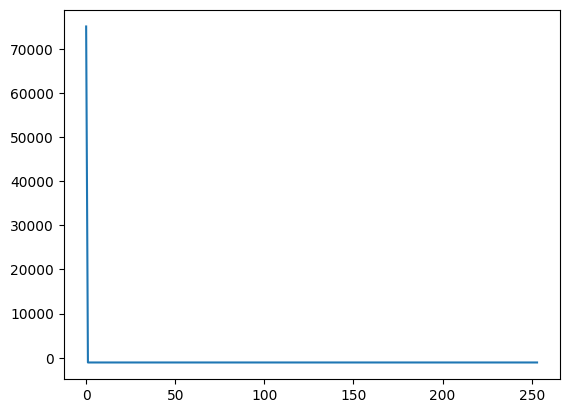

In [ ]:
plt.plot([y[1] for y in log2[0]])

## 2. DE

In [ ]:
# from DE import DE

In [ ]:
# DE(17, MAX_FES=500000)